# Q8

Here, we will  perform a simple linear regression with
**mpg** as the response and **horsepower** as the predictor over the **auto** dataset

## Applying the fit over our model

First, we import all the necessary libraries for preparing our model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import math

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import *

Now, we load the **auto** dataset

In [2]:
#Loading the auto dataset using read_csv function of pandas library as auto.
auto = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Auto.csv')
#Printing the data that we loaded
print(auto)

      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0    18.0          8         307.0         130    3504          12.0    70   
1    15.0          8         350.0         165    3693          11.5    70   
2    18.0          8         318.0         150    3436          11.0    70   
3    16.0          8         304.0         150    3433          12.0    70   
4    17.0          8         302.0         140    3449          10.5    70   
..    ...        ...           ...         ...     ...           ...   ...   
387  27.0          4         140.0          86    2790          15.6    82   
388  44.0          4          97.0          52    2130          24.6    82   
389  32.0          4         135.0          84    2295          11.6    82   
390  28.0          4         120.0          79    2625          18.6    82   
391  31.0          4         119.0          82    2720          19.4    82   

     origin                       name  
0         1  chevrolet

Observing our dataset to notice any missing values in our data, etc.

In [3]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


#### Now we use the **lm** function to perform a simple linear regression over our dataset.

In [4]:
X = auto[['horsepower']]
Y = auto[['mpg']]

In [7]:
lm = sm.OLS(Y, sm.add_constant(X)).fit()

In [ ]:
# smf alternative of the same
# lm = smf.ols('mpg~horspower', data = auto).fit()

To view the summary of our model, we use the **summary** function

In [8]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 20 Apr 2021   Prob (F-statistic):           7.03e-81
Time:                        15:05:41   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

## Qustions from exercise

In [9]:
lm.pvalues


const         1.220362e-187
horsepower     7.031989e-81
dtype: float64

Q1] (i) As we see from the summary of our model, **horsepower** (predictor) has a negligible p-value. Hence, we can reject the null-hypothesis for this simple linear regression model and say that there is a relationship between the __horsepower__ (predictor) and **mpg** (response).

In [10]:
lm.predict(pd.DataFrame(columns = ['constant', 'horsepower'], data = np.array([[1, 100]])))

0    24.151388
dtype: float64

Q1] (ii) According to our model, for every increase of 100 in **horsepower**, there is a decrease of 24.151388 in **mpg**.

In [11]:
print(lm.params)

const         39.935861
horsepower    -0.157845
dtype: float64


Q1] (iii) According to our model, since the coefficient assosciated with our predictor is negative, we can say that our predictor and response have a negative relationship, i.e. for some increase in predictor, there is a decrease in the response.

In [13]:
predictions = lm.get_prediction(pd.DataFrame(columns = ['constant', 'horsepower'], data = np.array([[1, 98]])))
predictions.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


Q1] (iv) The predicted **mpg** assosciated with a **horsepower** of 98 is hence 24.467077, with a 95% confidence interval of \[23.973079, 24.961075] and a 95% prediction interval of \[14.809396, 34.124758]

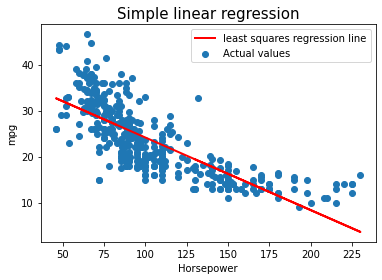

In [21]:
plt.scatter(X, Y, label = 'Actual values')
y_pred = lm.predict(sm.add_constant(X))
plt.plot(X, y_pred, color='red', linewidth=2, label = 'least squares regression line')
plt.title('Simple linear regression', fontsize = 15)
plt.xlabel('Horsepower')
plt.ylabel('mpg')
plt.legend()

Text(0.5, 0, 'Fitted values')

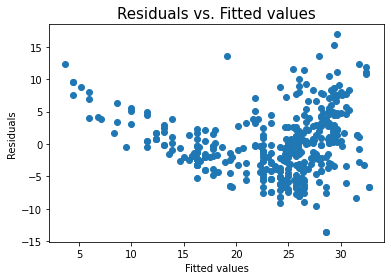

In [22]:
y_hat = lm.fittedvalues
lm_residuals = lm.resid
plt.scatter(y_hat, lm_residuals)
plt.title('Residuals vs. Fitted values', fontsize = 15)
plt.ylabel('Residuals')
plt.xlabel('Fitted values')

Text(0.5, 0, 'Leverage')

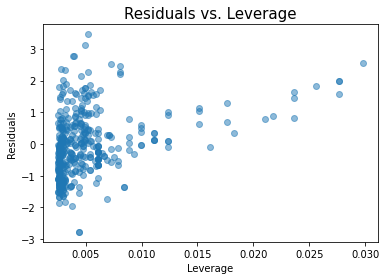

In [24]:
model_norm_residuals =lm.get_influence().resid_studentized_internal
model_leverage = lm.get_influence().hat_matrix_diag
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
plt.title('Residuals vs. Leverage', fontsize = 15)
plt.ylabel('Residuals')
plt.xlabel('Leverage')